Here I will run through the RDKIT tutorials from the RDKIT Github website and the 'Getting Started with Python' page. These can be found here; https://github.com/rdkit/rdkit-tutorials/tree/master/notebooks, and here; https://www.rdkit.org/docs/GettingStartedInPython.html. Whilst the majority of the content in this notebook is copied directly from these pages I have included some extra notes that may be beneficial to newer users/data scientists.

Extra recipes can be found at the RDKIT cookbook, https://www.rdkit.org/docs/Cookbook.html. 

RDKIT has been intalled within conda env my-rdkit-env - ensure this is the environment activated for these tutorials.

Update -- I have used this notebook to do some of the tutorials, and also to work on molecules that are of interest to me. The kernel should be set to 'docking-env' as this has all pf the correct dependancies installed.

# Reading and writing simple molecules 

In [3]:
# These are the libraries from rdkit that are required for the next steps.

from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

In [3]:
# Paths to data files - note that '..' means parent, so when the directory is on GH this is telling the computer to move out of the notebooks directory and into 'data' or 'results'.

import os

DATAPATH = '../data'
RESULTSPATH = '../results'


myfile = os.path.join(DATAPATH, "int_folder", "myfile.csv") #this is just an example

In [2]:
# This is a python module that provides various time-related functions.

import time
print(time.asctime())

Tue Feb 14 17:30:01 2023


The above is a python module that provides various time-related functions.

## Working with SMILES

Using the MolFromSmiles command is the easiest way to portray a smiles string as a 2D molecule.

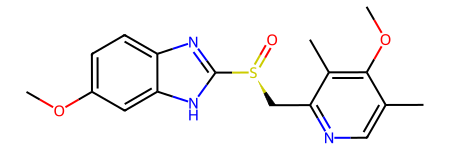

In [3]:
a = Chem.MolFromSmiles('COc1ccc2c(c1)[nH]c(n2)[S@@](=O)Cc1ncc(c(c1C)OC)C')

a

In [4]:
type(a)

rdkit.Chem.rdchem.Mol

a = is defining m as 'Molecule A'.
a at the end of the code performs the function (prints the smiles string in 2D).

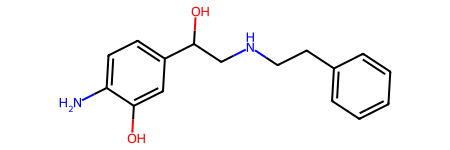

In [5]:
b = Chem.MolFromSmiles('Nc1ccc(C(O)CNCCc2ccccc2)cc1O')

b

The compound above was found in a Chembl similarity search against a compound that is itself similar to a reaction intermediate. I am interested in this intermediate as I am attempting to inhibit the enzyme responsible for its production. This compound, whens ubjected to the eos tb inhibition model (eos46ev), returned a 77 % chance of inhibiting M. tuberculosis, and is therefore a compound of interest.

You can also read from a smiles string and convert to molfile format, and vice versa:


     RDKit          2D

 25 28  0  0  0  0  0  0  0  0999 V2000
   -4.3909   -5.4663    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.3279   -4.4080    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.0130   -5.1298    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.5166   -5.0261    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0045   -6.4327    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.6862   -4.1299    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.8850   -5.0315    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.2135   -2.7256    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3361    2.6798    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0

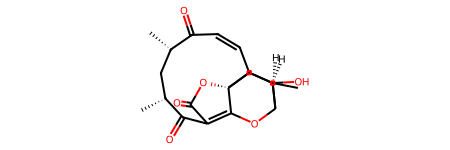

In [6]:
c = Chem.MolFromSmiles('C[C@H]1C[C@@H](C)C(=O)C2=C3OC4[C@H](C)C[C@@]3(OC2=O)C(/C=C/C1=O)[C@H]4O')
print(Chem.MolToMolBlock(c))
c

The above shows the smiles string converted to a molfile and then printed in 2D. The compound in question is abyssomicin C.

In [7]:
d = Chem.MolFromMolFile('/home/lyndenrooms/Ersilia_Collab_2023/Compound_lists/abyCmol.mol')
Chem.MolToSmiles(d)


'C[C@@H]1C[C@H](C)C(=O)/C=C\\C2[C@@H](O)C3OC4=C(C(=O)O[C@@]42C[C@H]3C)C1=O'

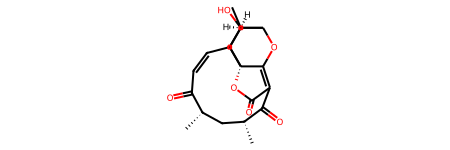

In [7]:
d

The above shows the conversion of a molfile to smiles and the subsequent printing of the molfile in 2D.

## Reading from a MOL file

MOL files can be found on databases and downloaded/copied.

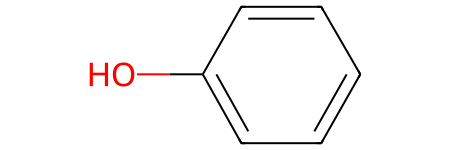

In [8]:
phenolmol = """phenol     
RDKit          2D

  7  7  0  0  0  0  0  0  0  0999 V2000
   -2.0583   -0.9000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.6208   -0.9000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0792   -2.1500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0792    0.3250    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5292    0.3250    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5292   -2.1500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.2375   -0.9000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  2  1  1  0
  3  2  2  0
  4  2  1  0
  5  4  2  0
  6  3  1  0
  7  6  2  0
  5  7  1  0
M  END
"""
e = Chem.MolFromMolBlock(phenolmol)
e

The above is the molfile of phenol from the Chembl database. Note how there are 3 x " on the first line, follwoed by the name of the compound (this could be swapped for any compound identifier). There are also 3 x " on the last line of the molfile. Phenolmol is defined. Chem.MolFomMolBlock is the command. m3 is defined and then executed.

In [9]:
e.GetNumConformers()

1

The above shows that this compound, read from the molblock, has only one conformer. The conformer is 2D (as per the figure). 

In [10]:
e.GetConformer().Is3D()

False

The above confirms the presence of a 2D conformer, rather than a 3D coformer.

Here is the molfile of a 3D molecule:

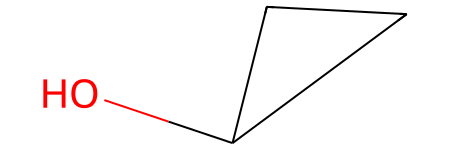

In [11]:
cyclopropanol3d ='''cyclopropanol-3D
  Mrv1682210081607153D          

 10 10  0  0  0  0            999 V2000
    0.9159    1.2233    0.2286 C   0  0  1  0  0  0  0  0  0  0  0  0
   -0.0738    1.2748   -0.9428 C   0  0  2  0  0  0  0  0  0  0  0  0
   -0.3167    0.3104    0.2232 C   0  0  2  0  0  0  0  0  0  0  0  0
   -1.3658    0.6623    1.1190 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.8730    0.7413    0.0155 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.8835    2.0739    0.9139 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.2747    0.8266   -1.8737 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7163    2.1557   -0.9817 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.1264   -0.7446    0.0137 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1210    0.2486    1.9735 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0  0  0  0
  2  3  1  0  0  0  0
  1  3  1  0  0  0  0
  3  4  1  0  0  0  0
  1  5  1  0  0  0  0
  1  6  1  0  0  0  0
  2  7  1  0  0  0  0
  2  8  1  0  0  0  0
  3  9  1  0  0  0  0
  4 10  1  0  0  0  0
M  END
'''
f = Chem.MolFromMolBlock(cyclopropanol3d)
f

You can see the conformer is 3D due to the non-0 coordinates in the third column of the file.

In [12]:
f.GetConformer().Is3D()

True

This confirms the above. To include hydrgoens on the structure we can disable the 'removeHs' command, which is the RDKIT default.

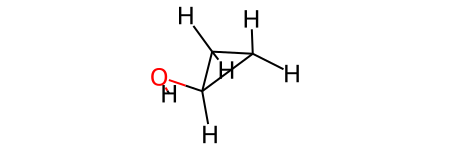

In [13]:
f_h = Chem.MolFromMolBlock(cyclopropanol3d,removeHs=False)
f_h

It is also possible to read molfiles directly from a file, when the path is specified:


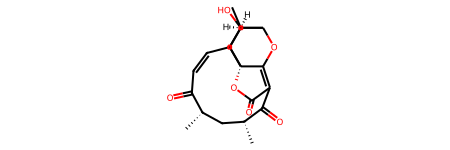

In [14]:
abyC = Chem.MolFromMolFile('/home/lyndenrooms/Ersilia_Collab_2023/Compound_lists/abyCmol.mol')
abyC

Here, the molfile of a compound (abyssomicin C) was downloaded from Chembl and loaded directly from the file.

## Reading numerous molecules

Reading sets of molecules requires the use of a supplier. 

In [15]:
suppl = Chem.SDMolSupplier('/home/lyndenrooms/Ersilia_Collab_2023/Compound_lists/simcompounds.sdf')
for mol in suppl:
    print(mol.GetNumAtoms())

13
22
22
11
12
32
13
13
23
13
22
11
32
12
16
13
11
13
13
17
14
11
13
12
9
13
22
13
20


This shows the number of atoms present in each of the compounds from the SDF file. The sdf file 'simcompounds' was downloaded from Chembl from the following compound (similarity search >40 %):

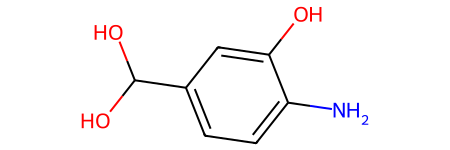

In [16]:
sim = Chem.MolFromSmiles('Nc1ccc(C(O)O)cc1O')
sim

The above was chosen as the reaction product of PabB (an enzyme I am interested in developing inhibitors against), is the following:

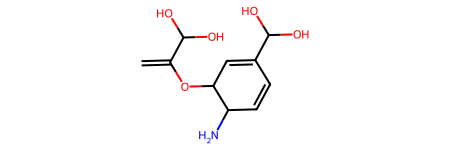

In [17]:
PabB_product = Chem.MolFromSmiles('C=C(OC1C=C(C(O)O)C=CC1N)C(O)O')
PabB_product

This returns no similar results.

In [18]:
with Chem.SDMolSupplier(os.path.join(DATAPATH, 'simcompounds.sdf')) as suppl:
    for i,mol in enumerate(suppl):
        if mol is None: 
            print(i)
        print(mol.GetNumAtoms())

NameError: name 'os' is not defined

This tests whether the file was written correctly before working with it. This is called a context manager.

In [ ]:
i = 0
with Chem.MultithreadedSmilesMolSupplier('/home/lyndenrooms/Ersilia_Collab_2023/Compound_lists/similaritycompounds.smi') as simsmiles:
    for mol in simsmiles:
        if mol is not None:
            i = i+1
print(i)

In [ ]:
mols = Chem.MultithreadedSmilesMolSupplier(os.path.join(DATAPATH, "simcompounds.sdf"))
i = 0
for i,mol in enumerate(mols):
    i +=1

print(i)

In [1]:
smiles_list = []
with open('/home/lyndenrooms/Ersilia_Collab_2023/Compound_lists/similaritycompounds.smi', 'r') as f:
    for l in f:
        l = l.strip('\n')
        smiles_list += [l]

In [6]:
for smi in smiles_list:
    mol = Chem.MolFromSmiles(smi)

The above is for reading smiles files, and there is a similar command for reading SDF files that contain a large amount of data. This is called a multi-thread supplier, in which one supplier extracts the records and another processes them.

The above **FAILED**. I will use a different method to open smiles files...

## Reading PDB Data 

Here, the data will be read from a file, as large macromolecules contain a lot of information in the PDB file. It is also not very informative to display the marcromolecule here.

In [7]:
pabb = Chem.MolFromPDBFile('/home/lyndenrooms/Ersilia_Collab_2023/VS_code/Bs_PabB_chainA.pdb')
pabb.GetNumAtoms()

3669

In [8]:
# get the residue information for each atom:
residues = [atom.GetPDBResidueInfo() for atom in pabb.GetAtoms()]
# and now the number and name of each residue
resinf = [(res.GetResidueNumber(),res.GetResidueName()) for res in residues]
# take a look at the first 20 of those:
resinf[:20]

[(3, 'GLN'),
 (3, 'GLN'),
 (3, 'GLN'),
 (3, 'GLN'),
 (3, 'GLN'),
 (3, 'GLN'),
 (3, 'GLN'),
 (3, 'GLN'),
 (3, 'GLN'),
 (4, 'ARG'),
 (4, 'ARG'),
 (4, 'ARG'),
 (4, 'ARG'),
 (4, 'ARG'),
 (4, 'ARG'),
 (4, 'ARG'),
 (4, 'ARG'),
 (4, 'ARG'),
 (4, 'ARG'),
 (4, 'ARG')]

In [9]:
# and get the ordered list of actual residues:
residues = sorted(set(resinf))
len(residues)

458

In [10]:
residues[:10]

[(1, 'TRP'),
 (3, 'GLN'),
 (4, 'ARG'),
 (5, 'ARG'),
 (6, 'PRO'),
 (7, 'ALA'),
 (8, 'GLY'),
 (9, 'LYS'),
 (10, 'LYS'),
 (11, 'ILE')]

Here, we can see 1) what residue each atom belongs to, 2) the total number of residues, and 3) the sequence. When [:10] is defined, this shows the first 10 of something, in this case residues. It is worth noting here that residue 2 is missing - some PDB files are incomplete due to the data collection process not allowing all of the atoms to be observed. Trp (here, residue 1) is also a heteroatom. Some prior knowledge of the PDB file and basic proteim biochemistry is beneficial in these cases, as here it looks as if only residue 2 is missing and residue 1 is a tryptophan, whereas actually residues 1 and 2 are missing, and residue 1 is methionine for all bacterial proteins.

## Reading other sequence formats

In [36]:
seq = 'TTCCPSIVAR SNFNVCRLPG TPEAICATYT GCIIIPGATC PGDYAN'
m = Chem.MolFromSequence(seq)
m.GetNumAtoms()

327

In [37]:
helm = 'PEPTIDE1{T.T.C.C.P.S.I.V.A.R.S.N.F.N.V.C.R.L.P.G.T.P.E.A.I.C.A.T.Y.T.G.C.I.I.I.P.G.A.T.C.P.G.D.Y.A.N}$$$$'
m = Chem.MolFromHELM(helm)
m.GetNumAtoms()

327

In [38]:
fasta =""">
TTCCPSIVARSNFNVCRLPGTPEAICATYTGCIIIPGATCPGDYAN
"""
m = Chem.MolFromFASTA(fasta)
m.GetNumAtoms()

327

# Calculations and Transformations

So far, the focus has been on the reading and writing of single and sets of molecules, and the writing of new file formats from smiles/molfiles etc. You may, however, want to perform calculations on the molecules, or generate 3D conformers from the 2D structures. This is what the next section will focus on.

In [5]:
# This is where charges can be added etc - code for this to be added.

## 2D-3D Conversion

Here, I am going to attempt to convert 2D smiles strings to 3D coords, contained within a molfile, and write this to a PDB file.

In [4]:
#Chem has been imported already - these are the other commands and libraries that are needed for the conversion.

from rdkit.Chem import AllChem
from rdkit.Chem.rdmolfiles import MolToPDBFile
from rdkit.Chem.rdmolfiles import MolFromPDBFile
from rdkit.Chem.rdMolDescriptors import CalcNumRotatableBonds

from scipy.spatial import distance_matrix

import MDAnalysis as mda

# import os, os.path (this is kept as a comment for now, it was on JT's notebook, may be important for docking).

import numpy as np
import matplotlib.pyplot as plt

/home/lyndenrooms/miniconda3/envs/docking-env/lib/python3.11/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In the section below, I will attempt to generate a 3D conformer of abyssomicin C from the smiles string, before moving onto working with .csv files containing numerous smiles strings.

In [5]:
# Generate the molecule from the smiles string, add hydrogens and produce 3D coords via ETKDG method.

c = Chem.MolFromSmiles('C[C@H]1C[C@@H](C)C(=O)C2=C3OC4[C@H](C)C[C@@]3(OC2=O)C(/C=C/C1=O)[C@H]4O')
c = Chem.AddHs(c)
AllChem.EmbedMolecule(c)

# Ouput coords to pdb
# This is what JT did: pdb_name = f"{output_dir}/{ID}.pdb"
 
pdb_name = 'abyC3d.pdb'
MolToPDBFile(c, "/home/lyndenrooms/github/novel-pabb-inhibitors-eos/data/abyc/abyC3d.pdb")

# Note - I can also add in DATAPATH = xxx/data, and then just use this instead of the full pathname.

Now, I will attempt to convert the 3D conformer into a charged .pdbqt file for docking.

In [7]:
pdb_name = '/home/lyndenrooms/github/novel-pabb-inhibitors-eos/data/abyc/abyC3d.pdb'
pH = 7.4

! obabel {pdb_name} -pH 7.4 -O /home/lyndenrooms/github/novel-pabb-inhibitors-eos/data/abyc/abyC3dcharge.pdb

pdbqt_str = pdb_name + 'qt' 
! obabel {pdb_name} -pH {pH} -O {pdbqt_str}

1 molecule converted
1 molecule converted


The above .pdbqt file of abyssomicin C can now be used for docking!

However, for the project I want to use multiple ligands, so the initial smiles input will be from a .csv file.

In [15]:
# The code be has been copied from JT's notebook and edited for my filenames and paths.

csv_file_name = '/home/lyndenrooms/Ersilia_Collab_2023/novel-inhibitors-of-PabB-gh/data/sim29/smiles3.csv' 
output_dir = '/home/lyndenrooms/Ersilia_Collab_2023/novel-inhibitors-of-PabB-gh/data/sim29'
pH = 7.4
header_len=1
delim=','

out_pdbqts = []
    
print(csv_file_name)
    
with open(csv_file_name, 'r') as csv:
        
        
    for entry in csv.readlines()[header_len:]:
            

        Similarity, ID, SMILES = entry.split(delim)[:3]
            
        # Convert smiles str to 3D coordinates
        mol = Chem.MolFromSmiles(SMILES)
        mol = Chem.AddHs(mol)
        AllChem.EmbedMolecule(mol)
            
    
        # Ouput coords to pdb
        pdb_name = f"{output_dir}/{ID}.pdb"
        MolToPDBFile(mol, pdb_name)
            
#             print(pdb_name)
            # Protonate according to pH
        ! obabel {pdb_name} -pH {pH} -O {pdb_name}
            
            
            # Also create a pdbqt for vina
        pdbqt_str = pdb_name + 'qt'
        ! obabel {pdb_name} -pH {pH} -O {pdbqt_str}
            
            
        out_pdbqts.append(pdbqt_str)
#             print()
            


/home/lyndenrooms/Ersilia_Collab_2023/novel-inhibitors-of-PabB-gh/data/sim29/smiles3.csv
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecu

The above worked - I removed the 'return out_pdbqts' from JT's notebook, because I hadn't set a 'def prepare_ligands()' at the start. I think this would be better, as this wouldreturn the pdbqts as one file.

I will try this now.

In [12]:
def prepare_ligands(csv_file_name='/home/lyndenrooms/Ersilia_Collab_2023/novel-inhibitors-of-PabB-gh/data/smiles3.csv',  pH=7.4, header_len=1, output_dir='/home/lyndenrooms/Ersilia_Collab_2023/novel-inhibitors-of-PabB-gh/data', delim=',') -> list:

 
    out_pdbqts = []
    
    print(csv_file_name)
    
    with open(csv_file_name, 'r') as csv:
        
        
        for entry in csv.readlines()[header_len:]:
            

            Similarity, ID, SMILES = entry.split(delim)[:3]
            
            # Convert smiles str to 3D coordinates
            mol = Chem.MolFromSmiles(SMILES)
            mol = Chem.AddHs(mol)
            AllChem.EmbedMolecule(mol)
            
    
            # Ouput coords to pdb
            pdb_name = f"{output_dir}/{ID}.pdb"
            MolToPDBFile(mol, pdb_name)
            
#             print(pdb_name)
            # Protonate according to pH
            ! obabel {pdb_name} -pH {pH} -O {pdb_name}
            
            
            # Also create a pdbqt for vina
            pdbqt_str = pdb_name + 'qt'
            ! obabel {pdb_name} -pH {pH} -O {pdbqt_str}
            
            
            out_pdbqts.append(pdbqt_str)
#             print()
            
    return out_pdbqts
        

In [14]:
sim29 = prepare_ligands('/home/lyndenrooms/Ersilia_Collab_2023/novel-inhibitors-of-PabB-gh/data/smiles3.csv', pH, output_dir='/home/lyndenrooms/Ersilia_Collab_2023/novel-inhibitors-of-PabB-gh/data/')

/home/lyndenrooms/Ersilia_Collab_2023/novel-inhibitors-of-PabB-gh/data/smiles3.csv
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule con

So, the above, whereby 'prepare_ligands' is specified, returns all of the pdbqt files separately. I think there is somewhere in smina where you can specificy the path, and get the software to dock all .pdbqt files - but I will have to check this when I look at the actual docking code!

The below attempts to generate .pdbqt files for all smiles in DrugBank.

In [16]:
csv_file_name = '/home/lyndenrooms/Ersilia_Collab_2023/novel-inhibitors-of-PabB-gh/data/drugbankall/drugbankallsmiles.csv' 
output_dir = '/home/lyndenrooms/Ersilia_Collab_2023/novel-inhibitors-of-PabB-gh/data/drugbankall'
pH = 7.4
header_len=1
delim=','

out_pdbqts = []
    
print(csv_file_name)
    
with open(csv_file_name, 'r') as csv:
        
        
    for entry in csv.readlines()[header_len:]:
            

        ID, Name, SMILES = entry.split(delim)[:3]
            
        # Convert smiles str to 3D coordinates
        mol = Chem.MolFromSmiles(SMILES)
        mol = Chem.AddHs(mol)
        AllChem.EmbedMolecule(mol)
            
    
        # Ouput coords to pdb
        pdb_name = f"{output_dir}/{ID}.pdb"
        MolToPDBFile(mol, pdb_name)
            
#             print(pdb_name)
            # Protonate according to pH
        ! obabel {pdb_name} -pH {pH} -O {pdb_name}
            
            
            # Also create a pdbqt for vina
        pdbqt_str = pdb_name + 'qt'
        ! obabel {pdb_name} -pH {pH} -O {pdbqt_str}
            
            
        out_pdbqts.append(pdbqt_str)
#             print()
            


/home/lyndenrooms/Ersilia_Collab_2023/novel-inhibitors-of-PabB-gh/data/drugbankall/drugbankallsmiles.csv
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


[14:47:42] UFFTYPER: Unrecognized atom type: Co5+3 (45)


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


[14:47:48] UFFTYPER: Unrecognized charge state for atom: 1


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule co

[14:48:19] UFFTYPER: Unrecognized hybridization for atom: 1
[14:48:19] UFFTYPER: Unrecognized atom type: Co+3 (1)


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule co

[14:49:30] UFFTYPER: Unrecognized charge state for atom: 0
[14:49:30] UFFTYPER: Unrecognized atom type: Gd2+3 (0)


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule co

[14:49:43] UFFTYPER: Unrecognized atom type: Ca+2 (0)


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule co

[14:49:53] SMILES Parse Error: syntax error while parsing: 
[14:49:53] SMILES Parse Error: Failed parsing SMILES '
' for input: '
'


ArgumentError: Python argument types in
    rdkit.Chem.rdmolops.AddHs(NoneType)
did not match C++ signature:
    AddHs(RDKit::ROMol mol, bool explicitOnly=False, bool addCoords=False, boost::python::api::object onlyOnAtoms=None, bool addResidueInfo=False)